# Mikhail Gulyi

## Building a CNN to classify images in the CIFAR-10 Dataset

I will work with the CIFAR-10 Dataset.  This is a well-known dataset for image classification, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The 10 classes are:

<ol start="0">
<li> airplane
<li>  automobile
<li> bird
<li>  cat
<li> deer
<li> dog
<li>  frog
<li>  horse
<li>  ship
<li>  truck
</ol>

import necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input, Conv2D, BatchNormalization
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from sklearn.metrics import confusion_matrix


load the data and look at its shape

In [2]:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()
print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


In [74]:
y_train[0]

array([6], dtype=uint8)

Turn  our target data into categorical form

In [3]:
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [75]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

[3]


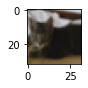

In [4]:
fig, ax = plt.subplots(figsize=(1, 1))
print(y_train[9])
ax.imshow(x_train[9]);

Create our model

In [5]:
model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_1.add(BatchNormalization())
model_1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))
model_1.add(Dropout(0.2))
model_1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))
model_1.add(Dropout(0.3))
model_1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))
model_1.add(Dropout(0.4))
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='softmax'))
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

Compile the model and train it

In [6]:
model_1.compile(optimizer='adam',
                loss='categorical_crossentropy', metrics=['accuracy'])
current_time = datetime.datetime.now()
with tf.device('/GPU:0'):
    history = model_1.fit(x_train, y_train_cat, epochs=30,
                          validation_data=(x_test, y_test_cat))
print('Training time: %s' % (datetime.datetime.now() - current_time))


Epoch 1/30
1563/1563 [==============================] - 17s 9ms/step - loss: 1.6244 - accuracy: 0.4361 - val_loss: 1.1776 - val_accuracy: 0.5798
Epoch 2/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1046 - accuracy: 0.6084 - val_loss: 0.9021 - val_accuracy: 0.6864
Epoch 3/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9170 - accuracy: 0.6788 - val_loss: 0.8139 - val_accuracy: 0.7201
Epoch 4/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8098 - accuracy: 0.7172 - val_loss: 0.7614 - val_accuracy: 0.7335
Epoch 5/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7273 - accuracy: 0.7491 - val_loss: 0.6368 - val_accuracy: 0.7787
Epoch 6/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6705 - accuracy: 0.7710 - val_loss: 0.6529 - val_accuracy: 0.7781
Epoch 7/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6202 - accuracy: 0.7897 - val_loss: 0.5477 - val_ac

Look at the obtained accuracy score

In [14]:
evaluation = model_1.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.4575 - accuracy: 0.8558
Test Accuracy: 0.8557999730110168


Predict on a single image

[3]


(3, 0.99601716)

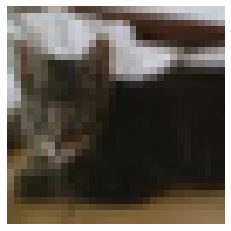

In [15]:
print(y_train[9])
plt.imshow(x_train[9]);
plt.axis('off')
np.argmax(model_1.predict(x_train[9][np.newaxis,:])), np.max(model_1.predict(x_train[9][np.newaxis,:]))

This function will help visualize our predictions more conveniently

In [16]:
def predict_image_class(img, model):
    fig, ax = plt.subplots(1, 2, constrained_layout=True)
    ax[0].imshow(img)
    ax[0].axis('off')
    names = ['airplane', 'automobile', 'bird', 'cat',
             'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    predicton = model.predict(img[np.newaxis, :])[0]
    class_number = np.argmax(predicton)
    #print(pd.Series(predicton, index=names))
    print('Class number:', class_number)
    print('Class name:', names[class_number])
    sns.barplot(x=predicton,y=names, ax=ax[1])


Let's make some predictions with my own examples

Class number: 3
Class name: cat


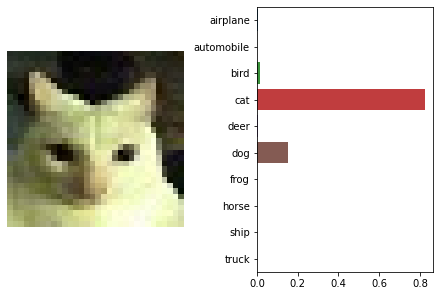

In [17]:
cat = plt.imread('data/cat.jpg')
predict_image_class(cat, model_1)

Class number: 1
Class name: automobile


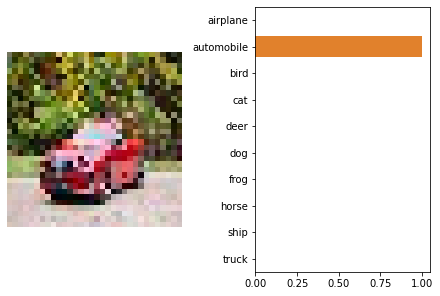

In [19]:
car = plt.imread('data/car.jpg')
predict_image_class(car, model_1)

Class number: 2
Class name: bird


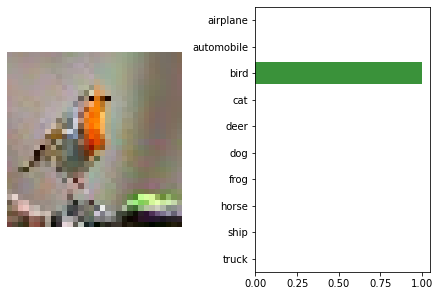

In [20]:
bird = plt.imread('data/bird.jpg')
predict_image_class(bird, model_1)

Class number: 9
Class name: truck


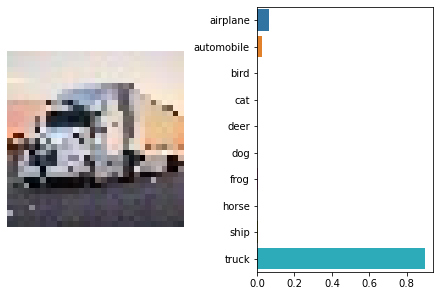

In [24]:
truck = plt.imread('data/truck.jpg')
predict_image_class(truck, model_1)

As we can see, our test set has the same number of images of each class

In [65]:
pd.Series(y_test_cat.argmax(axis=1)).value_counts()

0    1000
8    1000
1    1000
9    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
dtype: int64

Let's create a confusion matrix to figure out which classes are misclassified the most

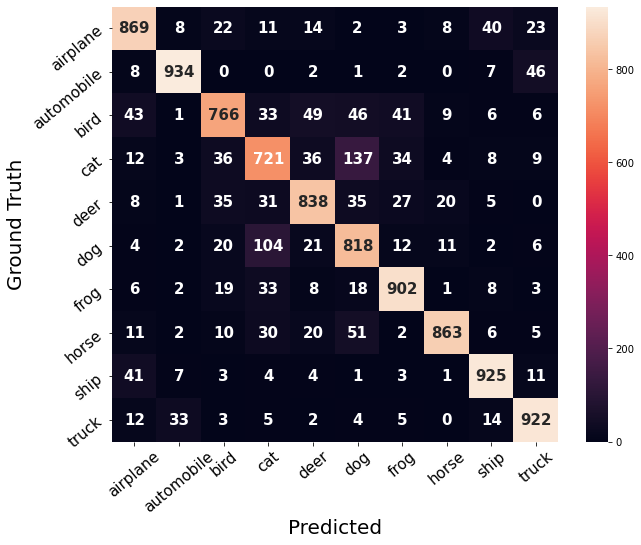

In [71]:
predicted = model_1.predict(x_test)
names = ['airplane', 'automobile', 'bird', 'cat',
         'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, ax = plt.subplots(figsize=(10, 8))
conf_mat = confusion_matrix(y_true=y_test_cat.argmax(axis=1),
                            y_pred=predicted.argmax(axis=1))
sns.heatmap(conf_mat, annot=True, fmt='d',
            annot_kws={"size": 15, "weight": "bold"}, ax=ax)
ax.set_xticklabels(names, rotation=40, fontsize=15)
ax.set_yticklabels(names, rotation=40, fontsize=15)
ax.set_xlabel('Predicted', fontsize=20)
ax.set_ylabel('Ground Truth', fontsize=20);
